# THỰC HÀNH: CÁC GIẢI THUẬT PHÂN LOẠI CƠ BẢN

## A. MỤC TIÊU CHƯƠNG

Mục tiêu của phần thực hành các giải thuật phân loại dữ liệu (Data Classification Algorithms)
được thiết kế để giúp sinh viên phát triển kỹ năng áp dụng các giải thuật phân loại vào việc
giải quyết các bài toán thực tế trong khoa học dữ liệu. Cụ thể, phần thực hành nhằm đạt được
các mục tiêu sau: Hiểu và triển khai các thuật toán phân loại: Cây quyết định và rừng cây
(Decision Tree & Random Forest), Support Vector Machine (SVM) và Bayes ngây thơ (Naive
Bayes) thông qua ngôn ngữ lập trình như Python và sử dụng các thư viện Scikit-learn, SciPy,...

Hướng dẫn thực hiện việc triển khai xây dựng một mô hình học máy cổ điển với các bước:
- Tiền xử lý dữ liệu: Hướng dẫn cách chuẩn bị dữ liệu, bao gồm xử lý giá trị thiếu, chuẩn hóa
dữ liệu, và mã hóa các biến phân loại để phù hợp với yêu cầu của các thuật toán phân loại.
- Đánh giá và tối ưu hóa mô hình: sinh viên sẽ thực hành đánh giá hiệu suất mô hình thông qua các chỉ số như accuracy, precision, recall, F1-score và sử dụng các kỹ thuật như cross-
validation, grid search để tối ưu hóa tham số.

- Phân tích và diễn giải kết quả: Phát triển khả năng diễn giải kết quả phân loại, nhận diện các
vấn đề như quá khớp (overfitting) và đề xuất cải tiến.

## B. KẾT CẤU THỰC HÀNH

Thực hành bao gồm 3 phần là
- Giải thuật cây quyết định và rừng cây
- Giải thuật Support Vector Machine (SVM)
- Giải thuật Bayes ngây thơ

## C. NỘI DUNG THỰC HÀNH

### 2.1. GIẢI THUẬT 1: CÂY QUYẾT ĐỊNH VÀ RỪNG CÂY

### 2.1.2. Bài làm mẫu

#### Bài toán 1: Xây dựng cây quyết định và rừng cây với dữ liệu lấy từ
https://www.kaggle.com/datasets/deceneu/default-of-credit-card-clients

***

##### Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

**1. Tải một số package mà chúng tôi sử dụng và package graphviz, để vẽ cây quyết định**

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

**2. Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải
quyết**

In [2]:
df = pd.read_csv('dataset/default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

**3. Chuẩn bị dữ liệu cho tập train và tập test**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,  # Features (all columns except the last one)
    df['default payment next month'].values,  # Target variable
    test_size=0.2, 
    random_state=24,
    stratify=df['default payment next month'].values  # Optional: for stratified sampling
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Training set - Class distribution: {np.bincount(y_train)}")
print(f"Test set - Class distribution: {np.bincount(y_test)}")

Training set size: 24000 samples
Test set size: 6000 samples
Number of features: 17
Training set - Class distribution: [18691  5309]
Test set - Class distribution: [4673 1327]


**4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn**

In [4]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

**5. Hiển thị cây quyết định với package graphviz (thay thế bằng matplotlib)**

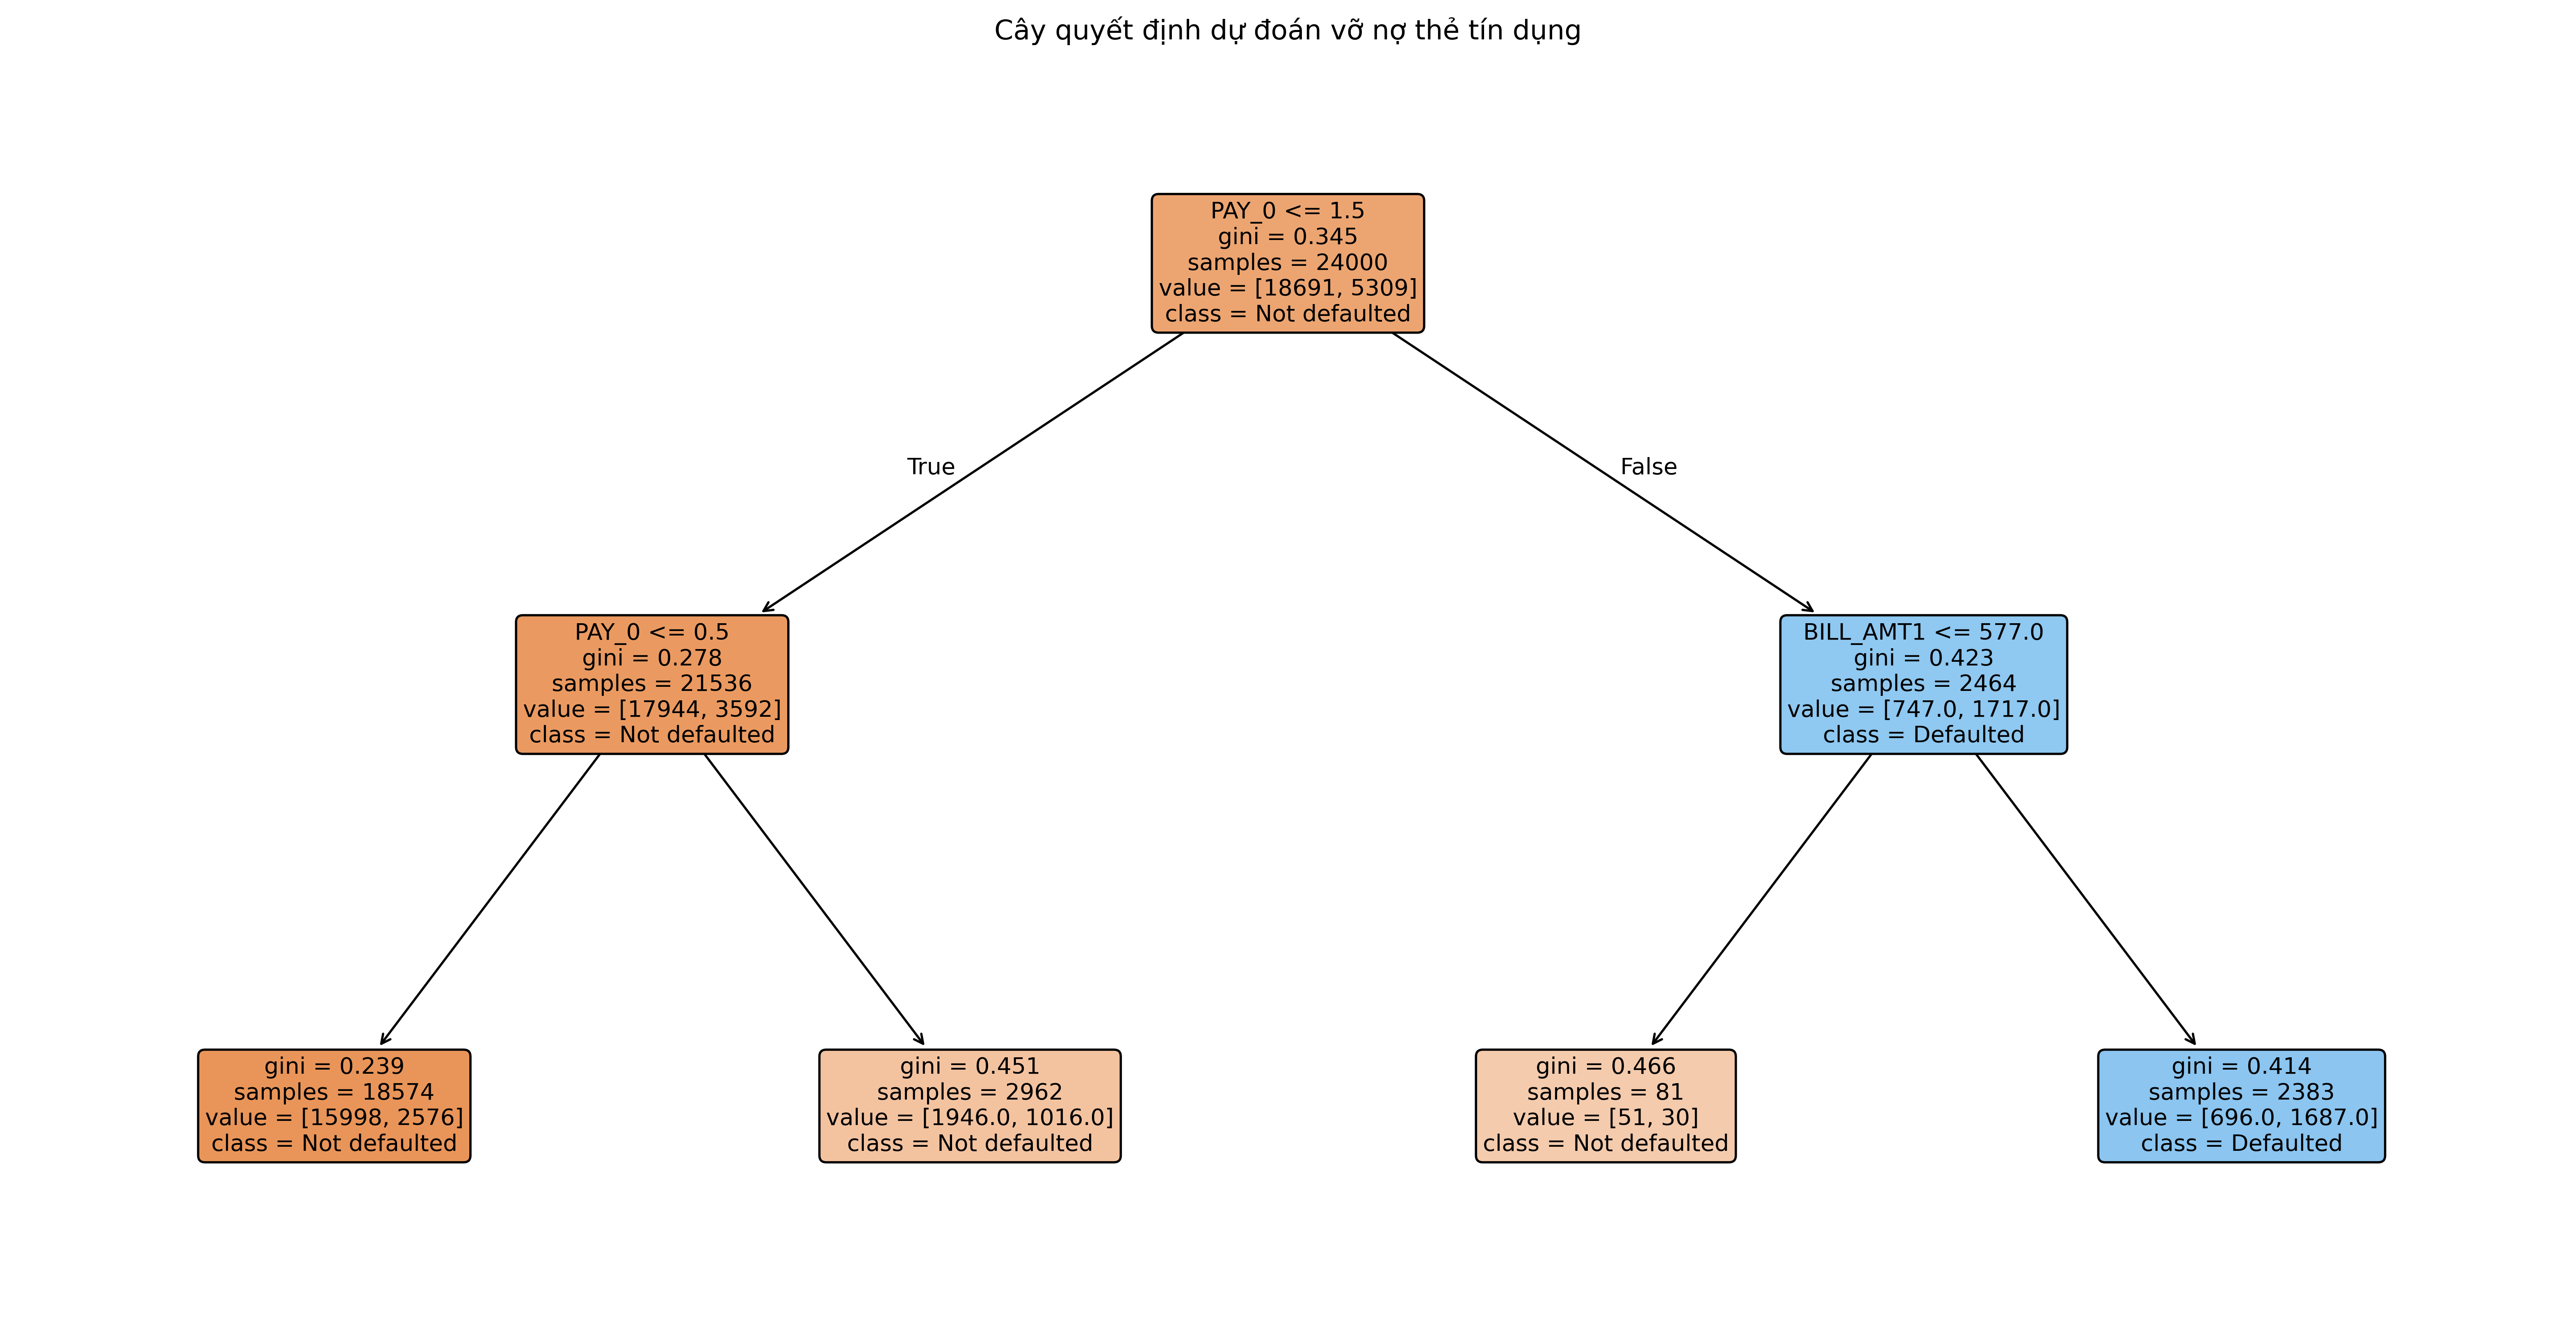

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, 
          filled=True,
          rounded=True,
          feature_names=features_response[:-1],
          class_names=['Not defaulted', 'Defaulted'],
          fontsize=10,
          max_depth=3)  # Hiển thị 3 tầng đầu cho dễ nhìn
plt.title('Cây quyết định dự đoán vỡ nợ thẻ tín dụng')
plt.show()

##### Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

**1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu**

**2. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu**

In [8]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
#Thử 7 giá trị độ sâu khác nhau từ cây rất nông (depth=1) đến khá sâu (depth=12)

dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True) # cv is the best model.
#scoring='roc_auc' → Ưu tiên phân loại tốt (AUC quan trọng hơn accuracy)

#cv=4 → 4-fold cross-validation (chia data thành 4 phần, train 3 test 1)

#refit=True → Tự động train lại model tốt nhất trên toàn bộ data

#verbose=1 → Hiển thị tiến trình

return_train_score=True → Ghi lại điểm train để so sánh overfitting
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [19]:
# Sau khi chạy xong, xem kết quả:
print("Độ sâu tốt nhất:", cv.best_params_)
print("Điểm AUC tốt nhất:", cv.best_score_)

# Model tốt nhất đã được train tự động
best_dt = cv.best_estimator_

Độ sâu tốt nhất: {'max_depth': 6}
Điểm AUC tốt nhất: 0.7464000301203957


**3. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau**

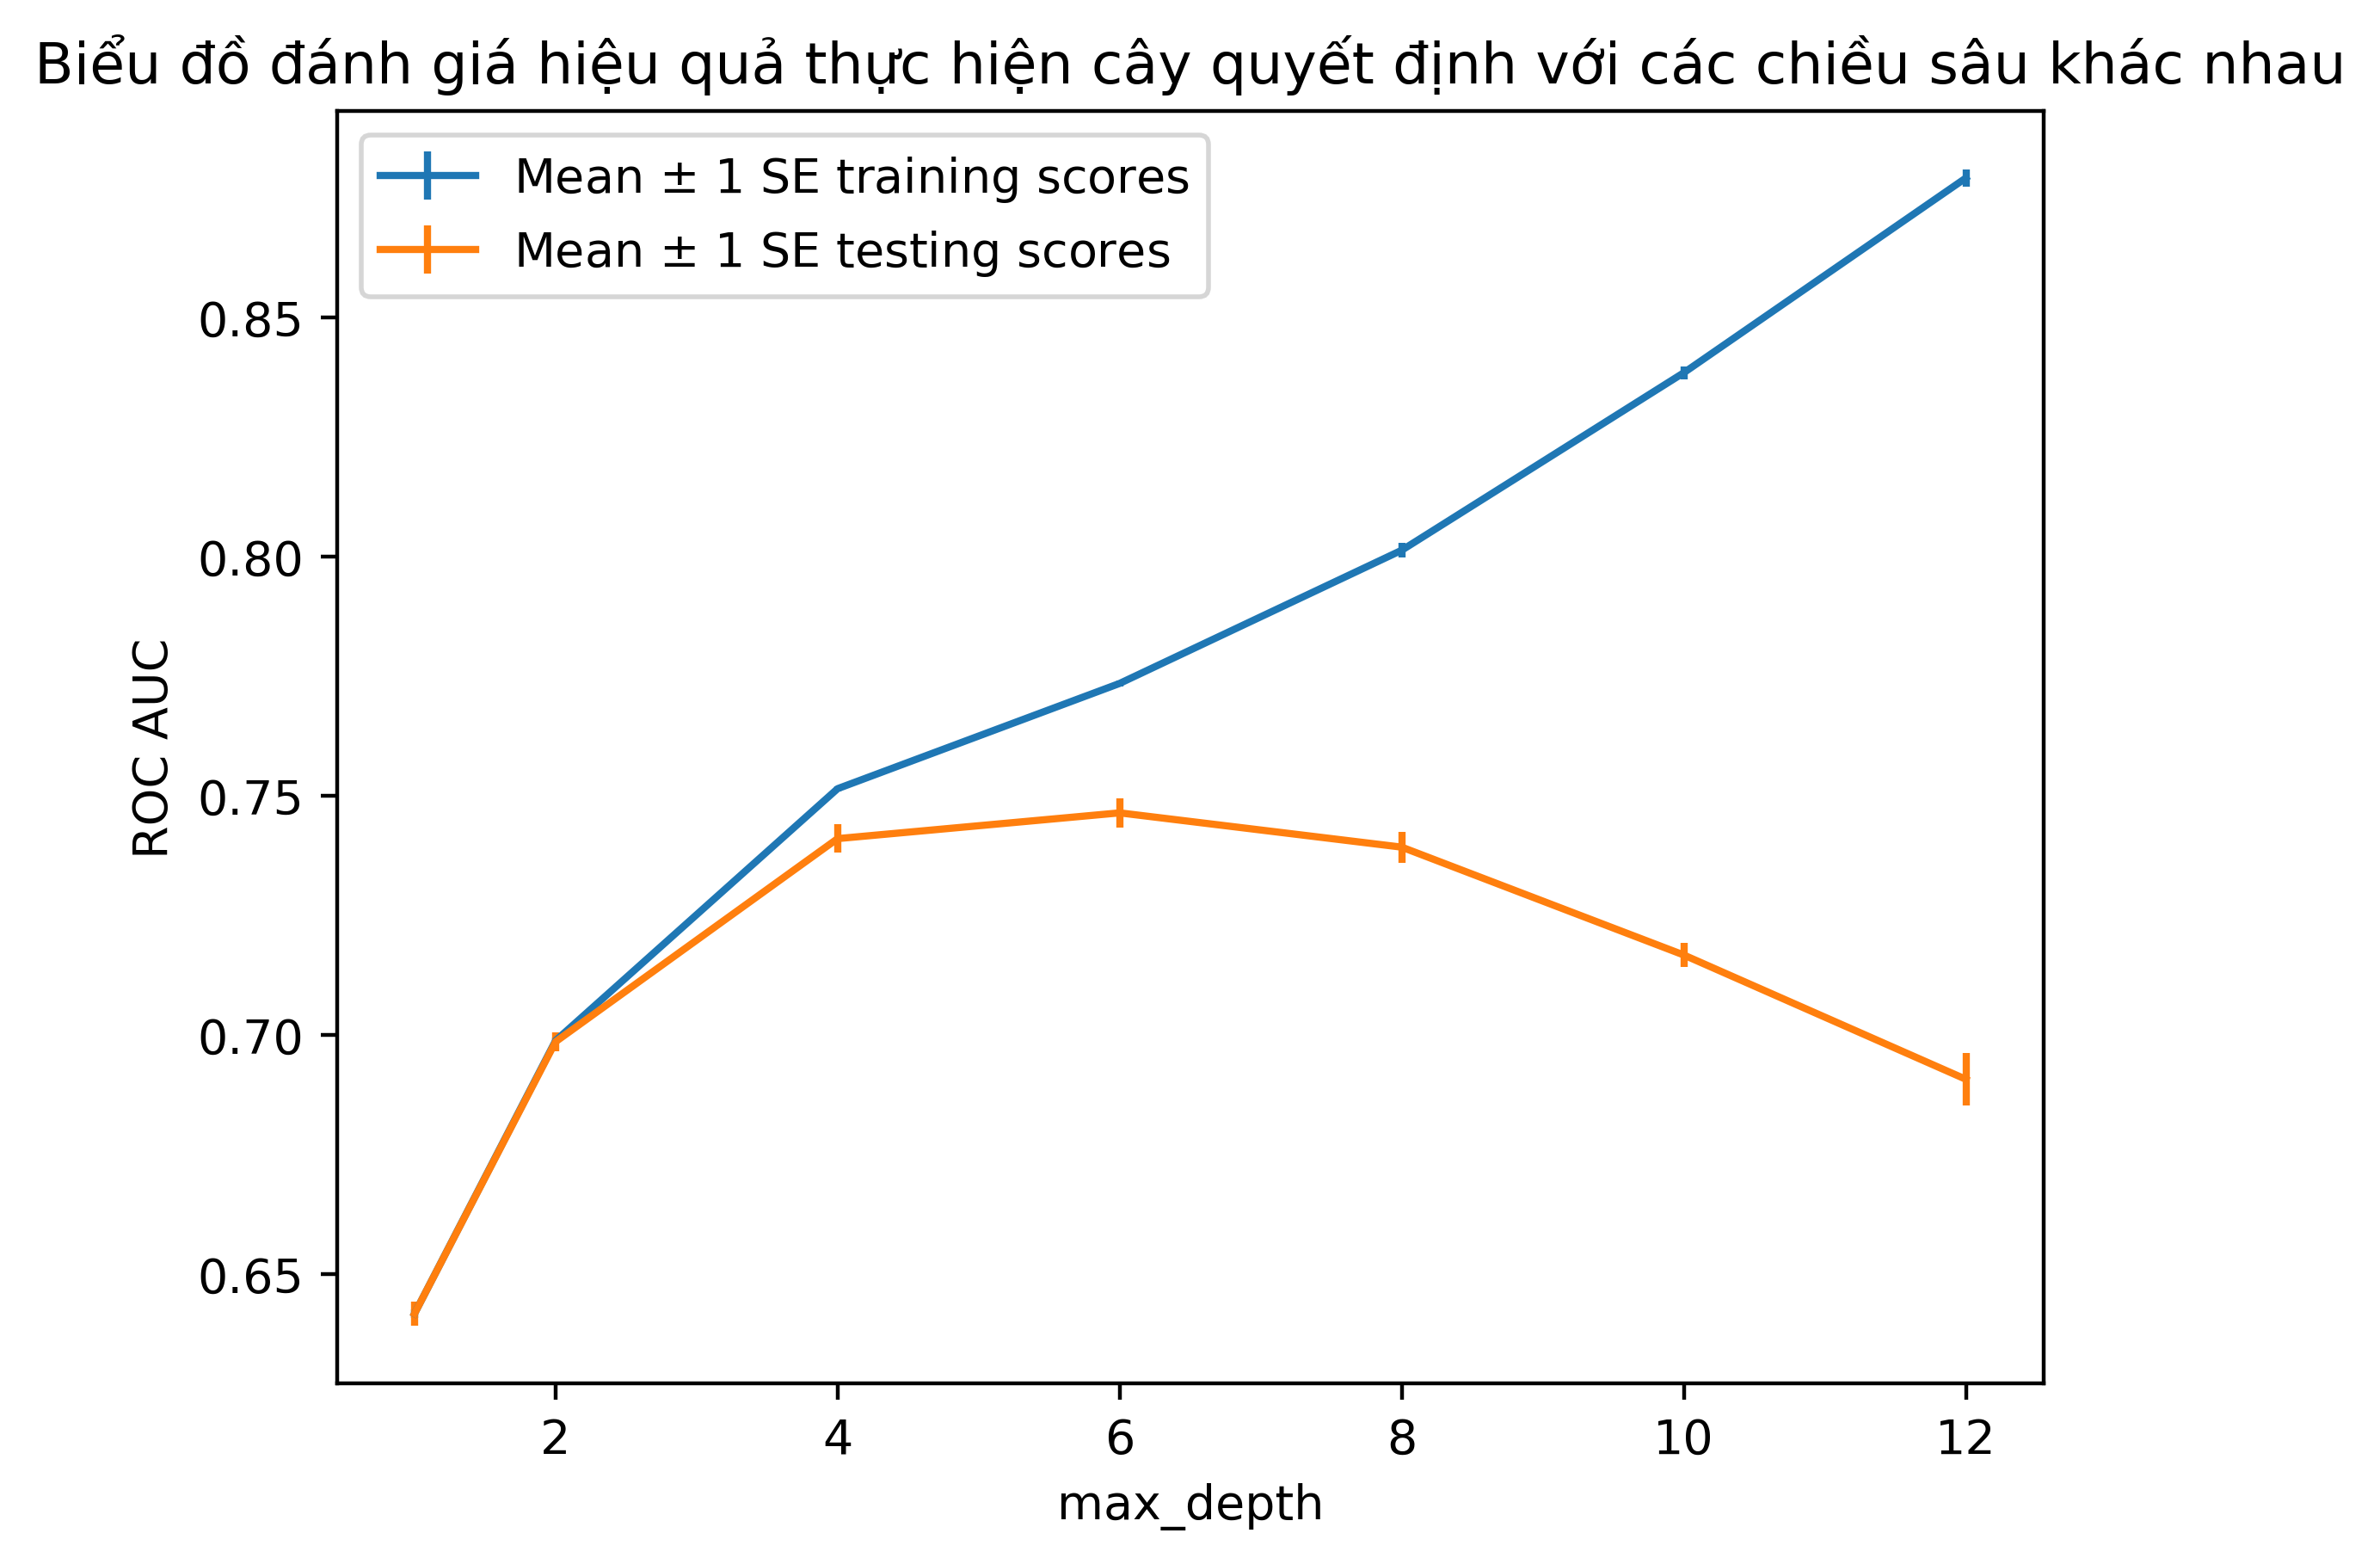

In [13]:
cv_results_df = pd.DataFrame(cv.cv_results_)

# View the names of the remaining columns in the results DataFrame
cv_results_df.columns

ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Biểu đồ đánh giá hiệu quả thực hiện cây quyết định với các chiều sâu khác nhau')
plt.show()

##### Nhiệm vụ 3: Xây dựng rừng cây (random forest)

**1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu**
    
**2. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn**

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=3,
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0,
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0,
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None,
    random_state=4, 
    verbose=0, 
    warm_start=False, 
    class_weight=None
)

**3. Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó**

In [24]:
# A parameter grid for this exercise in order to search the numbers of
# trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                      scoring='roc_auc', n_jobs=None,
                      refit=True, cv=4, verbose=1,
                      error_score=np.nan,
                      return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [25]:
print("Số cây tốt nhất:", cv_rf_ex.best_params_)
print("Điểm AUC tốt nhất:", cv_rf_ex.best_score_)

# Model tốt nhất đã được train sẵn
best_rf = cv_rf_ex.best_estimator_

Số cây tốt nhất: {'n_estimators': 50}
Điểm AUC tốt nhất: 0.7628644271833113


**4. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau**

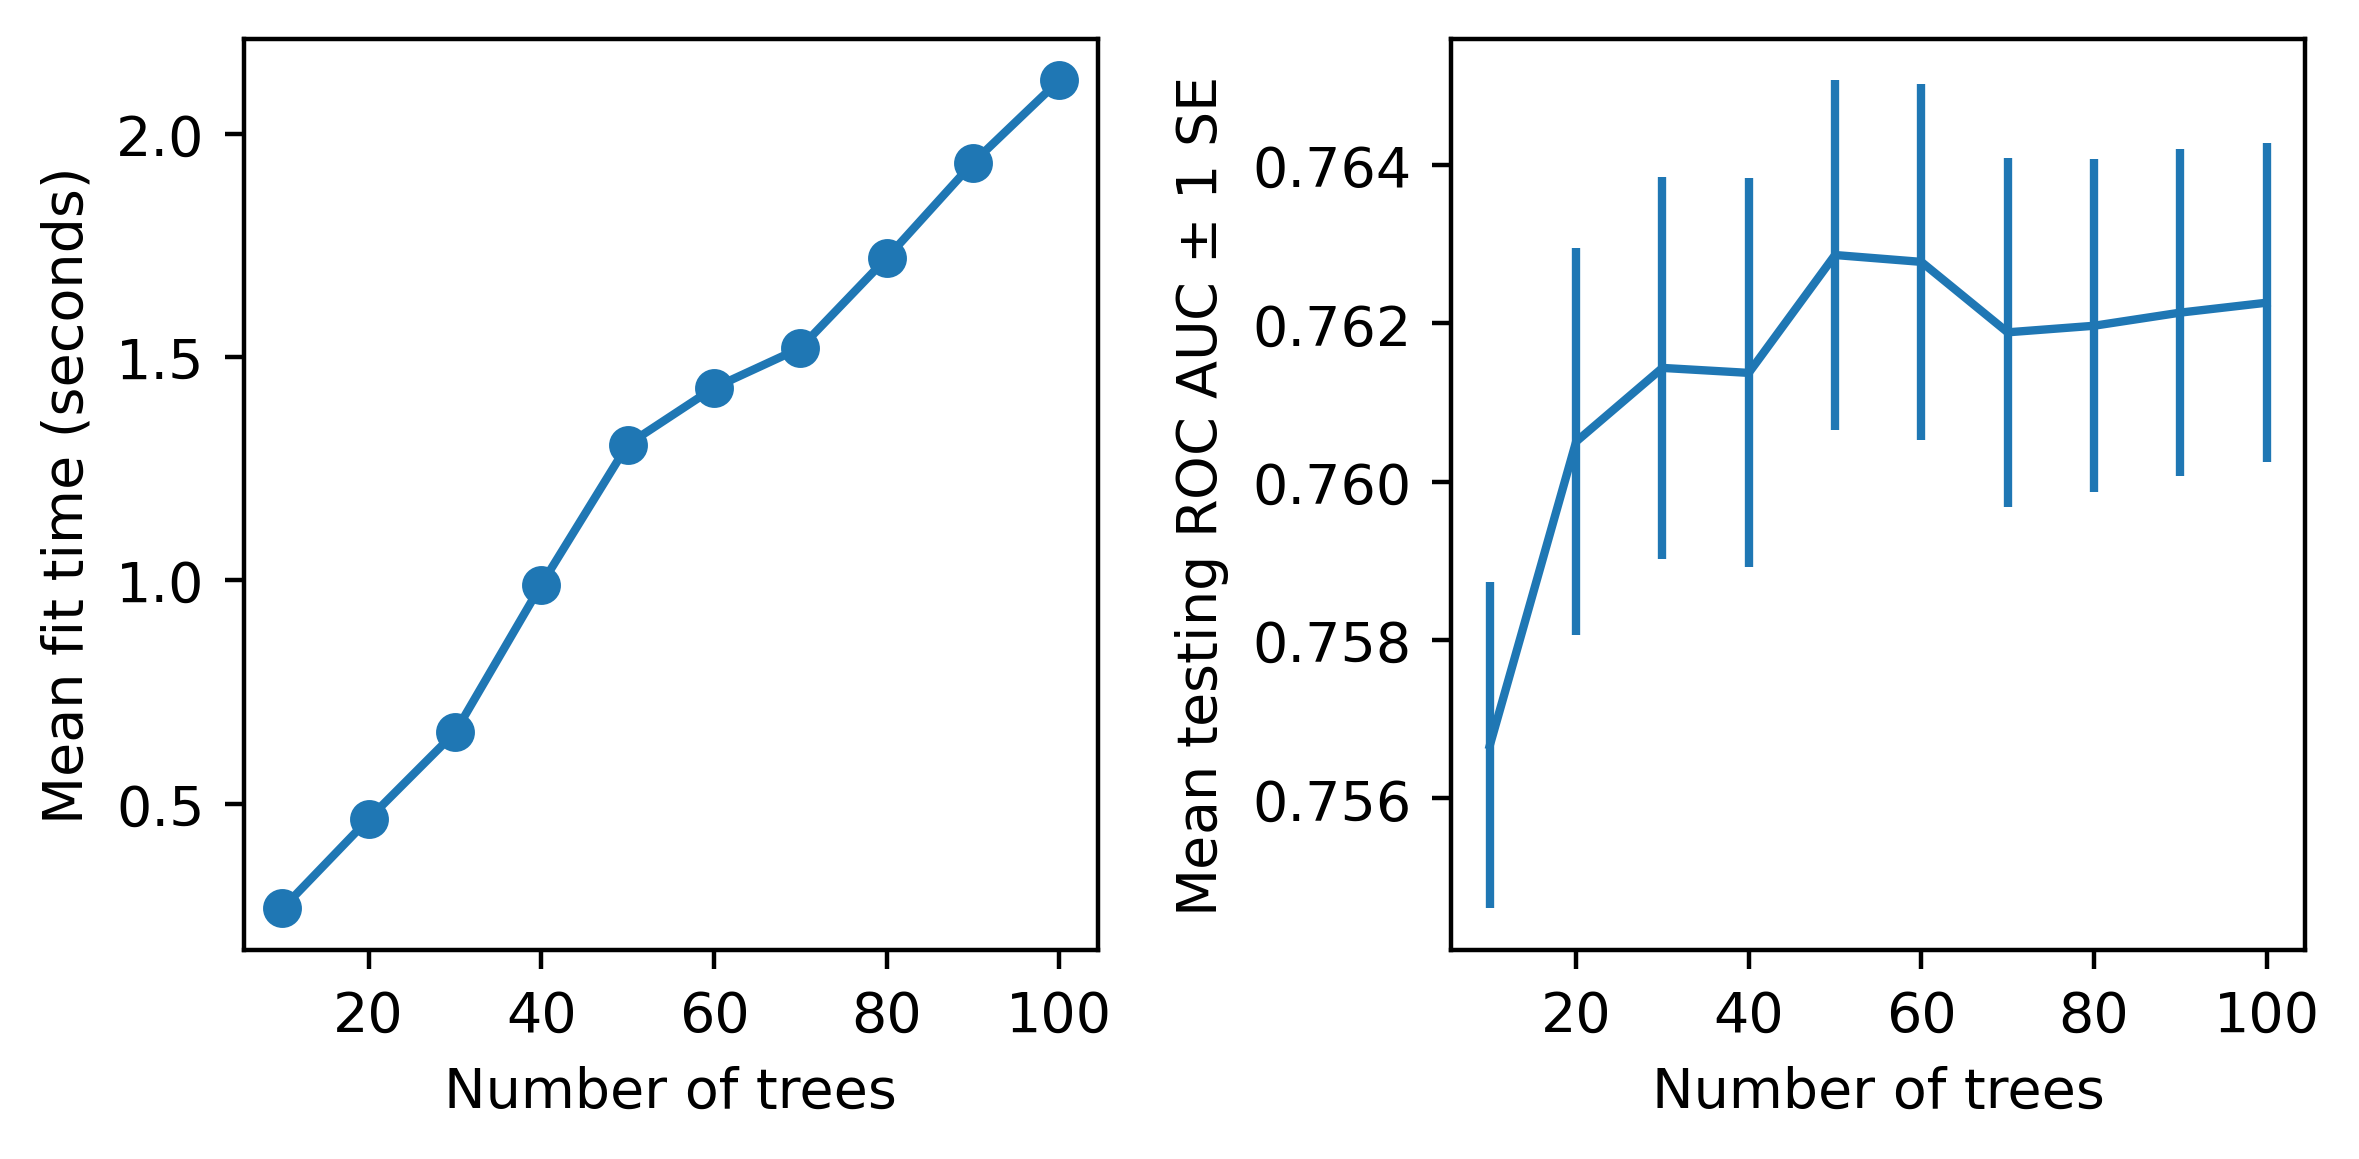

In [26]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()
plt.show()

**5. Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham
số tốt nhất**

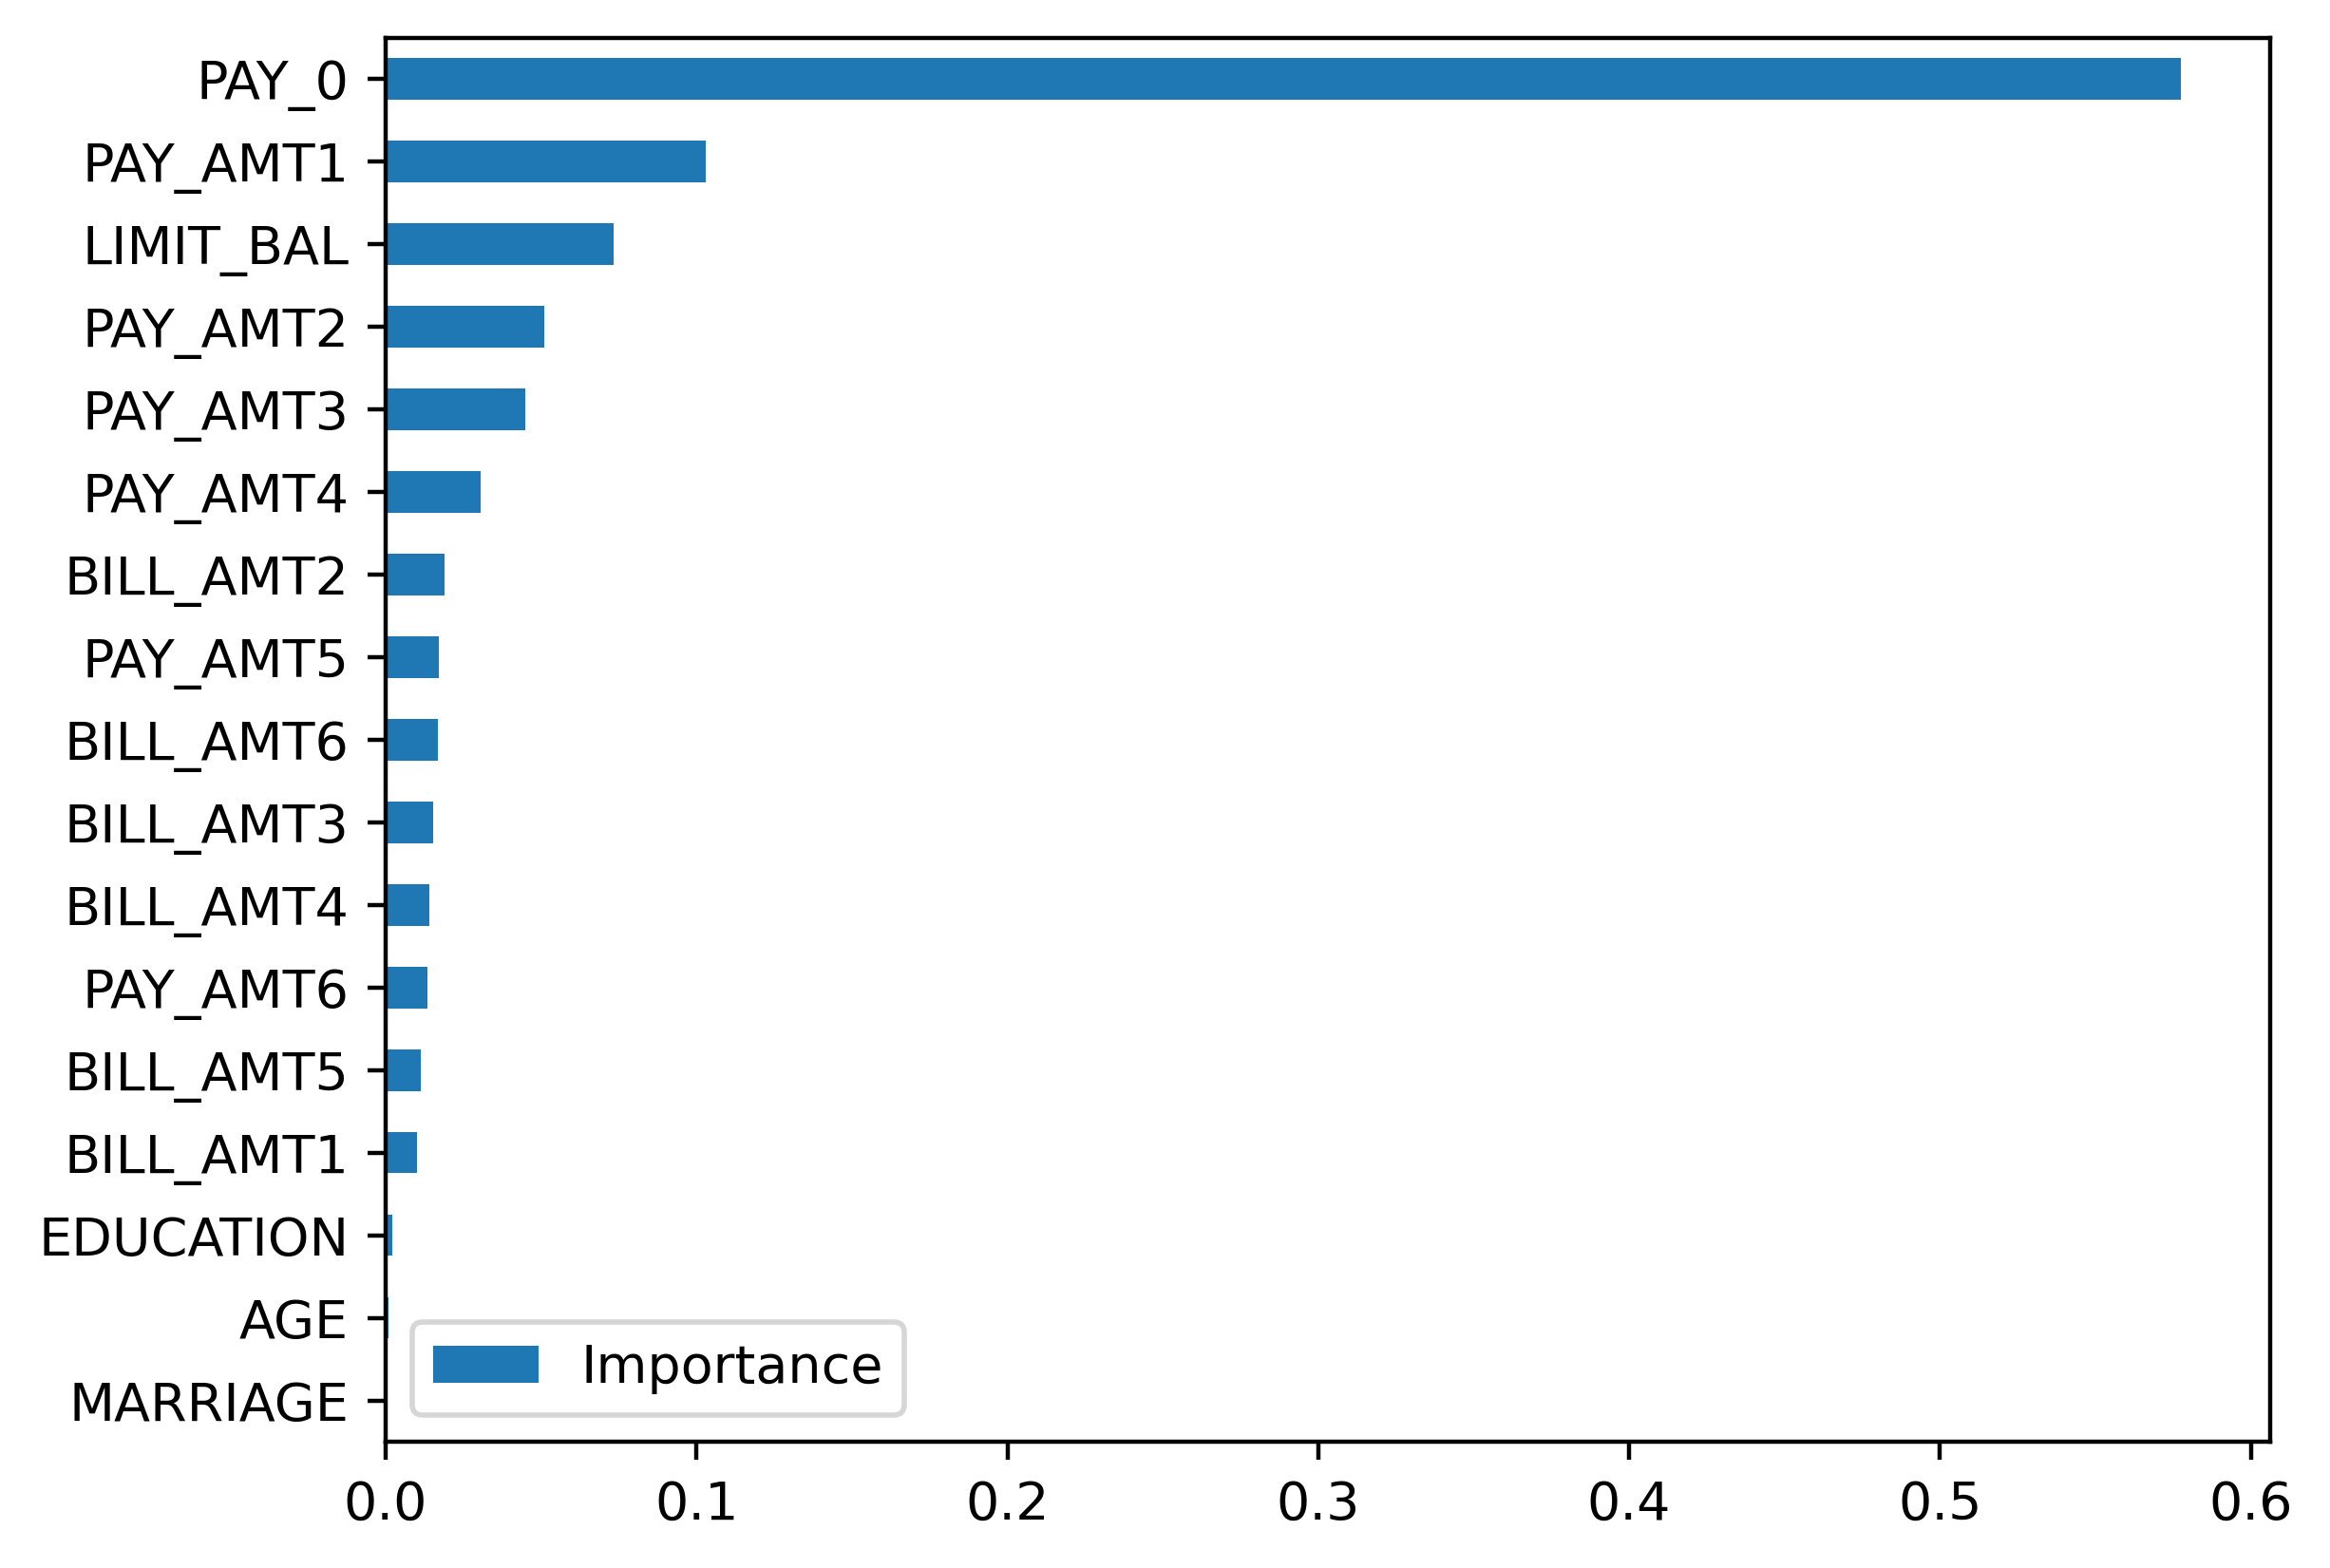

In [29]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# the feature names and importances
feat_imp_df = pd.DataFrame({
'Importance':cv_rf_ex.best_estimator_.feature_importances_},
index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.show()

### 2.1.3. Bài tập thực hành 1

Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ
https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

Mục tiêu của dự án này là xây dựng và so sánh các mô hình Cây quyết định (Decision Tree) và Rừng ngẫu nhiên (Random Forest) trên bộ dữ liệu Titanic để vừa đạt hiệu năng dự đoán tốt vừa rút ra các insight giải thích được. Quy trình bao gồm: tiền xử lý dữ liệu và kỹ thuật tạo đặc trưng (feature engineering), chọn tập đặc trưng phù hợp, huấn luyện mô hình với cross‑validation để tránh overfitting, tối ưu tham số, đánh giá hiệu năng bằng các chỉ số phù hợp và trực quan hóa cấu trúc cây cùng tầm quan trọng của đặc trưng. Kết quả kỳ vọng không chỉ là một mô hình có độ chính xác cao mà còn là các quy tắc dễ hiểu giúp giải thích những yếu tố ảnh hưởng đến khả năng sống sót của hành khách.

#### 1. Import thư viện

In [12]:
import numpy as np  # numerical computation
import pandas as pd  # data wrangling
import matplotlib.pyplot as plt  # plotting package

# Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl  # add'l plotting functionality
mpl.rcParams['figure.dpi'] = 150  # high res figures

#### 2. Tải và khám phá dữ liệu, phân tích và loại bỏ feature không liên quan

In [3]:
df = pd.read_csv('dataset/train.csv')

# Xem thông tin dữ liệu
print("Thông tin dữ liệu Titanic:")
print(df.info())
print("\n5 dòng đầu tiên:")
print(df.head())
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())

Thông tin dữ liệu Titanic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

5 dòng đầu tiên:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5

In [4]:
# Xử lý dữ liệu thiếu
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\boeot\AppData\Local\Temp\ipykernel_12564\415520991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\boeot\AppData\Local\Temp\ipykernel_12564\415520991.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
# Tạo feature mới từ Cabin
df['HasCabin'] = df['Cabin'].notna().astype(int)

In [6]:
# Mã hóa biến phân loại
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df = pd.get_dummies(df, columns=['Embarked'], prefix='Emb', drop_first=True)

In [7]:
# Lấy danh sách các cột
features_response = df.columns.tolist()

In [8]:
# Loại bỏ những cột không liên quan đến bài toán
items_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
features_response = [item for item in features_response if item not in items_to_remove]

print("\nCác features sử dụng:")
print(features_response)


Các features sử dụng:
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Emb_Q', 'Emb_S']


### 3. Chuẩn bị dữ liệu cho tập train và tập test

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
    train_test_split(df[features_response[:-1]].values,
                     df['Survived'].values,
                     test_size=0.2, random_state=24)

print(f"\nKích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")


Kích thước tập train: (712, 9)
Kích thước tập test: (179, 9)


### 4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [10]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

# Đánh giá mô hình
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"\nĐộ chính xác trên tập train: {train_score:.4f}")
print(f"Độ chính xác trên tập test: {test_score:.4f}")


Độ chính xác trên tập train: 1.0000
Độ chính xác trên tập test: 1.0000


### 5. Hiển thị cây quyết định 

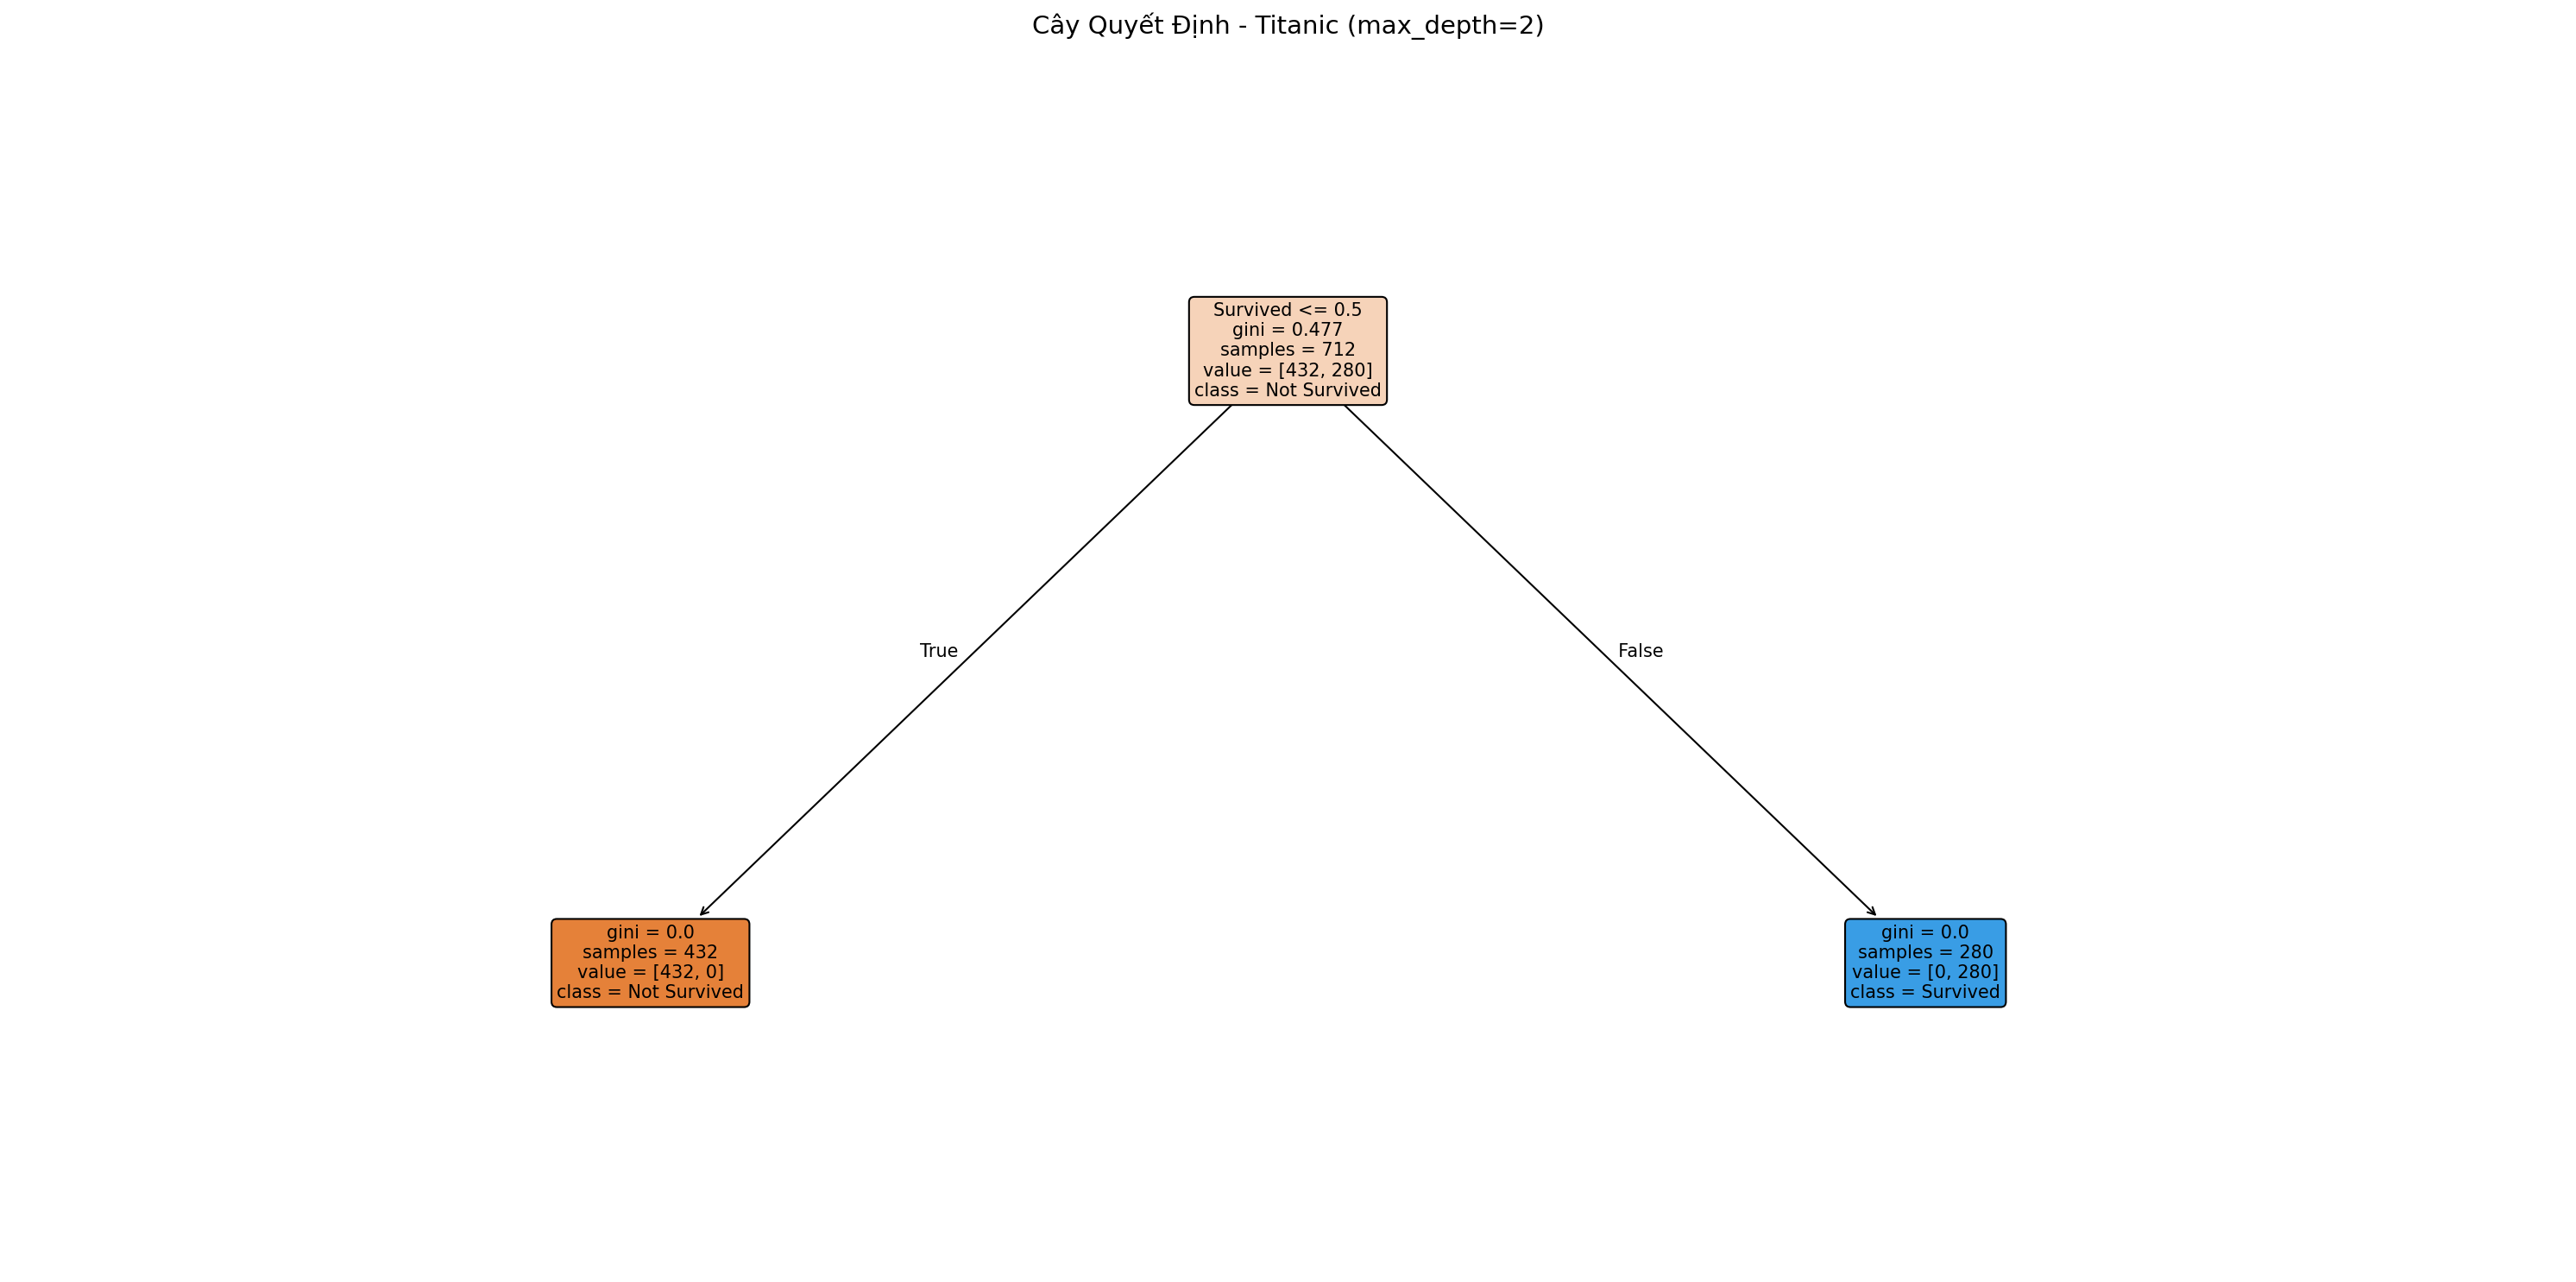

In [14]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt,
                   feature_names=features_response[:-1],
                   class_names=['Not Survived', 'Survived'],
                   filled=True,
                   rounded=True,
                   fontsize=10)
plt.title('Cây Quyết Định - Titanic (max_depth=2)', fontsize=14)
plt.tight_layout()
plt.savefig('titanic_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}  # parameters
dt = tree.DecisionTreeClassifier()  # tree model
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  error_score=np.nan,
                  return_train_score=True)  # cv is the best model.
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [17]:
print("\n" + "="*60)
print("KẾT QUẢ TÌM THAM SỐ TỐI ƯU")
print("="*60)
print(f"Tham số tốt nhất: {cv.best_params_}")
print(f"ROC AUC tốt nhất: {cv.best_score_:.4f}")



KẾT QUẢ TÌM THAM SỐ TỐI ƯU
Tham số tốt nhất: {'max_depth': 1}
ROC AUC tốt nhất: 1.0000



Các cột trong kết quả GridSearchCV:
['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'mean_train_score', 'std_train_score']


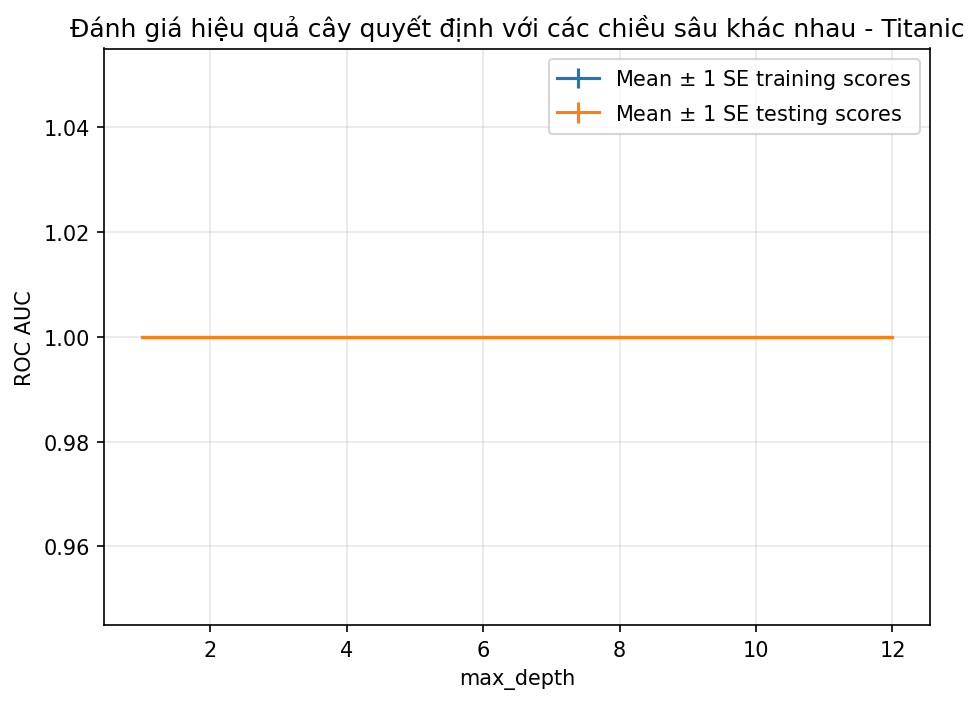

In [18]:
cv_results_df = pd.DataFrame(cv.cv_results_)

# View the names of the remaining columns in the results DataFrame
print("\nCác cột trong kết quả GridSearchCV:")
print(cv_results_df.columns.tolist())

ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Đánh giá hiệu quả cây quyết định với các chiều sâu khác nhau - Titanic')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('titanic_dt_gridsearch.png', dpi=300, bbox_inches='tight')
plt.show()
